# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/will/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
display(powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
for frame in [heroes_df, powers_df]:
    display(frame.info(), frame.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Deadpool,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [5]:
heroes_df = heroes_df[['name', 'Gender', 'Height', 'Weight', 'Publisher',\
                      'Race', 'Eye color', 'Hair color', 'Skin color', 'Alignment']]
for col in heroes_df.columns:
    print(col, len(heroes_df[col].unique()))

name 715
Gender 3
Height 54
Weight 136
Publisher 25
Race 62
Eye color 23
Hair color 30
Skin color 17
Alignment 4


In [6]:
# Investigating duplicate/multiple hero names
duplicates = pd.concat([heroes_df['name'], heroes_df['name'].duplicated(keep=False)], axis=1)
duplicates.columns = ['name', 'is_dup']
for hero in sorted(set(duplicates.name.loc[duplicates.is_dup==True])):
    display(heroes_df.loc[heroes_df.name==hero])
    display(powers_df.loc[powers_df.hero_names==hero])

,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
22,Angel,Male,183.0,68.0,Marvel Comics,-,blue,Blond,-,good
23,Angel,Male,-99.0,-99.0,Dark Horse Comics,Vampire,-,-,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel,True,True,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
47,Atlas,Male,183.0,101.0,Marvel Comics,Mutant,brown,Red,-,good
48,Atlas,Male,198.0,126.0,DC Comics,God / Eternal,blue,Brown,-,bad


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
44,Atlas,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
49,Atom,Male,178.0,68.0,DC Comics,-,blue,Red,-,good
50,Atom,Male,-99.0,-99.0,DC Comics,-,-,-,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
45,Atom,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
62,Batgirl,Female,-99.0,-99.0,DC Comics,-,-,-,-,good
63,Batgirl,Female,170.0,57.0,DC Comics,Human,green,Red,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
58,Batgirl,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
68,Batman,Male,188.0,95.0,DC Comics,Human,blue,black,-,good
69,Batman,Male,178.0,77.0,DC Comics,Human,blue,Black,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
61,Batman,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
96,Black Canary,Female,165.0,58.0,DC Comics,Human,blue,Blond,-,good
97,Black Canary,Female,170.0,59.0,DC Comics,Metahuman,blue,Blond,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
88,Black Canary,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
115,Blizzard,Male,-99.0,-99.0,Marvel Comics,-,-,-,-,bad
116,Blizzard,Male,-99.0,-99.0,Marvel Comics,-,-,Brown,-,bad


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
104,Blizzard,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
122,Blue Beetle,Male,-99.0,-99.0,DC Comics,-,blue,Brown,-,good
123,Blue Beetle,Male,-99.0,-99.0,DC Comics,-,-,-,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
110,Blue Beetle,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
155,Captain Marvel,Female,180.0,74.0,Marvel Comics,Human-Kree,blue,Blond,-,good
156,Captain Marvel,Male,193.0,101.0,DC Comics,Human,blue,Black,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
139,Captain Marvel,True,True,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
259,Firestorm,Male,-99.0,-99.0,DC Comics,-,brown,Black,-,good
260,Firestorm,Male,188.0,91.0,DC Comics,Human,blue,Auburn,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
236,Firestorm,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
289,Goliath,Male,-99.0,-99.0,Marvel Comics,-,-,-,-,good
290,Goliath,Male,-99.0,-99.0,Marvel Comics,Human,-,-,-,good
291,Goliath,Male,-99.0,-99.0,Marvel Comics,Human,-,-,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
481,Namor,Male,-99.0,-99.0,Marvel Comics,-,-,-,-,good
482,Namor,Male,188.0,125.0,Marvel Comics,Atlantean,grey,Black,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
437,Namor,True,True,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
496,Nova,Male,185.0,86.0,Marvel Comics,Human,brown,Brown,-,good
497,Nova,Female,163.0,59.0,Marvel Comics,Human / Cosmic,white,Red,gold,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
450,Nova,True,True,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
617,Speedy,Male,-99.0,-99.0,DC Comics,Human,-,-,-,good
618,Speedy,Female,-99.0,-99.0,DC Comics,Human,green,Brown,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
565,Speedy,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
622,Spider-Man,Male,178.0,74.0,Marvel Comics,Human,hazel,Brown,-,good
623,Spider-Man,-,178.0,77.0,Marvel Comics,Human,red,Brown,-,good
624,Spider-Man,Male,157.0,56.0,Marvel Comics,Human,brown,Black,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
568,Spider-Man,True,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
673,Toxin,Male,188.0,97.0,Marvel Comics,Symbiote,blue,Brown,-,good
674,Toxin,Male,191.0,117.0,Marvel Comics,Symbiote,black,Blond,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
617,Toxin,True,True,False,False,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
695,Vindicator,Female,165.0,54.0,Marvel Comics,Human,green,Red,-,good
696,Vindicator,Male,-99.0,-99.0,Marvel Comics,-,-,-,-,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
637,Vindicator,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
For numeric values (height, weight) it would actually be preferable to use `NaN` rather than the placeholder, `-99`, since it would skew any analysis, and make it cumbersome to always have to filter out those values.

For categorical data, `'NA'` is actually preferable, since sometimes being 'uncategorized' can actually be a useful category. In any case, this can be filtered out if needed.

The exception is alignment: since there are so few, the ones with `'-'` have been merged into `'neutral'` - the vast majority are `'good'` or `'bad'`.

As for duplicates (based on hero names), there is no perfect solution, because:
- Some are true duplicates, with almost identical data
- Some are from different publishers (Both DC and Marvel have a 'Captain Marvel')
- There is only one entry per hero name in `powers_df`, but no identifier that could match up with a hero in `heroes_df`

Thus, the approach I will take is to create a slimmed down dataframe to eventually join with the powers_df. If there is no obvious 'preferable' hero, based on amount/quality of data, the first hero listed will be kept.

Because of the small number of duplicates, these determinations and choices will have to be made by hand - it would take longer to develop an algorithm to do this rather than eyeballing it, and using the indices to choose which heroes to drop from the dataframe.
   

In [7]:
# Replace all '-' with 'NA' in categorical columns
def impute_na(stat):
    if stat == '-':
        return 'NA'
    else:
        return stat
for col in ['Eye color', 'Gender', 'Race', 'Hair color', 'Publisher', 'Skin color', 'Alignment']:
    heroes_df[col] = heroes_df[col].apply(impute_na)
    display(heroes_df[col].value_counts())

blue                       225
NA                         172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
yellow / blue                1
blue / white                 1
bown                         1
white / red                  1
indigo                       1
silver                       1
green / blue                 1
yellow / red                 1
Name: Eye color, dtype: int64

Male      505
Female    200
NA         29
Name: Gender, dtype: int64

NA               304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
                ... 
Human-Spartoi      1
Martian            1
Bolovaxian         1
Parademon          1
Planet             1
Name: Race, Length: 62, dtype: int64

NA                  172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Brown / White         4
Silver                4
blond                 3
black                 3
Blue                  3
Yellow                2
Orange                2
Red / White           1
Brown / Black         1
Brownn                1
Pink                  1
Gold                  1
Red / Orange          1
Black / Blue          1
Indigo                1
Orange / White        1
Magenta               1
Red / Grey            1
Name: Hair color, dtype: int64

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
South Park             1
Microsoft              1
J. K. Rowling          1
Hanna-Barbera          1
Universal Studios      1
Rebellion              1
J. R. R. Tolkien       1
Titan Books            1
Name: Publisher, dtype: int64

NA                662
green              21
blue                9
red                 9
white               7
silver              5
grey                5
gold                3
purple              3
pink                2
yellow              2
orange              1
blue-white          1
black               1
orange / white      1
red / black         1
gray                1
Name: Skin color, dtype: int64

good       496
bad        207
neutral     24
NA           7
Name: Alignment, dtype: int64

In [8]:
# Merge 'NA' alignments into 'neutral'
heroes_df['Alignment'] = heroes_df['Alignment']\
    .map({'good':'good', 'bad':'bad', 'neutral':'neutral', 'NA':'neutral'})
heroes_df['Alignment'].value_counts()

good       496
bad        207
neutral     31
Name: Alignment, dtype: int64

In [9]:
# Fill NaN in 'Publisher'
heroes_df['Publisher'].fillna(value='NA', inplace=True)
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
NA                    15
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Microsoft              1
J. K. Rowling          1
South Park             1
Hanna-Barbera          1
Universal Studios      1
Rebellion              1
J. R. R. Tolkien       1
Titan Books            1
Name: Publisher, dtype: int64

In [10]:
bad_ht_wt = heroes_df[(heroes_df['Weight'] < 0) | (heroes_df['Height'] < 0)]
display(bad_ht_wt[['Height', 'Weight']].describe())
bad_ht_wt = bad_ht_wt[['Height', 'Weight']]
display(bad_ht_wt['Height'].value_counts())
display(bad_ht_wt['Weight'].value_counts())
# There are 242 missing Height and/or Weight:
# 212 without Height and Weight
# 25 just without Heights
# 5 just without Weights

,Height,Weight
count,242.000000,242.000000
mean,-69.316942,-94.487603
std,89.488087,32.836352
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,-99.000000,-99.000000
75%,-99.000000,-99.000000
max,304.800000,198.000000


-99.0     217
 183.0      5
 170.0      3
 188.0      3
 213.0      2
 193.0      2
 178.0      2
 304.8      1
 226.0      1
 279.0      1
 297.0      1
 168.0      1
 185.0      1
 30.5       1
 61.0       1
Name: Height, dtype: int64

-99.0     237
 149.0      1
 198.0      1
 176.0      1
 2.0        1
 72.0       1
Name: Weight, dtype: int64

In [11]:
print(f'{round(242/734*100, 2)}% are missing height and/or weight!')

32.97% are missing height and/or weight!


In [12]:
heroes_df[['Weight','Height']] = heroes_df[['Weight','Height']].replace(-99, np.nan)
heroes_df[['Weight','Height']].describe()

,Weight,Height
count,495.000000,517.000000
mean,112.252525,186.726306
std,104.151142,59.251895
min,2.000000,15.200000
25%,61.000000,173.000000
50%,81.000000,183.000000
75%,108.000000,191.000000
max,900.000000,975.000000


### Summary:
#### 734 total entries

name: 17 duplicated names (two triple, the rest double), but no missing data

Gender: 29 listed as '-', converted to 'NA'

Eye color: 172 listed as '-', converted to 'NA'

Race: 304 listed as '-', converted to 'NA'

Hair color: 172 listed as '-', converted to 'NA'

Height/Weight: 242 missing Height and/or Weight, replaced with NaN for analysis purposes

Publisher: 15 listed as '-', converted to 'NA'

Skin color: 662 listed as '-', converted to 'NA'

Alignment: a few listed as '-', merged into 'neutral' (total 31)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [13]:
# List out all 'duplicated' heroes
for hero in sorted(set(duplicates.name.loc[duplicates.is_dup==True])):
    display(heroes_df.loc[heroes_df.name==hero])
    display(powers_df.loc[powers_df.hero_names==hero])

,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
22,Angel,Male,183.0,68.0,Marvel Comics,NA,blue,Blond,NA,good
23,Angel,Male,NaN,NaN,Dark Horse Comics,Vampire,NA,NA,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel,True,True,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
47,Atlas,Male,183.0,101.0,Marvel Comics,Mutant,brown,Red,NA,good
48,Atlas,Male,198.0,126.0,DC Comics,God / Eternal,blue,Brown,NA,bad


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
44,Atlas,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
49,Atom,Male,178.0,68.0,DC Comics,NA,blue,Red,NA,good
50,Atom,Male,NaN,NaN,DC Comics,NA,NA,NA,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
45,Atom,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
62,Batgirl,Female,NaN,NaN,DC Comics,NA,NA,NA,NA,good
63,Batgirl,Female,170.0,57.0,DC Comics,Human,green,Red,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
58,Batgirl,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
68,Batman,Male,188.0,95.0,DC Comics,Human,blue,black,NA,good
69,Batman,Male,178.0,77.0,DC Comics,Human,blue,Black,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
61,Batman,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
96,Black Canary,Female,165.0,58.0,DC Comics,Human,blue,Blond,NA,good
97,Black Canary,Female,170.0,59.0,DC Comics,Metahuman,blue,Blond,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
88,Black Canary,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
115,Blizzard,Male,NaN,NaN,Marvel Comics,NA,NA,NA,NA,bad
116,Blizzard,Male,NaN,NaN,Marvel Comics,NA,NA,Brown,NA,bad


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
104,Blizzard,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
122,Blue Beetle,Male,NaN,NaN,DC Comics,NA,blue,Brown,NA,good
123,Blue Beetle,Male,NaN,NaN,DC Comics,NA,NA,NA,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
110,Blue Beetle,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
155,Captain Marvel,Female,180.0,74.0,Marvel Comics,Human-Kree,blue,Blond,NA,good
156,Captain Marvel,Male,193.0,101.0,DC Comics,Human,blue,Black,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
139,Captain Marvel,True,True,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
259,Firestorm,Male,NaN,NaN,DC Comics,NA,brown,Black,NA,good
260,Firestorm,Male,188.0,91.0,DC Comics,Human,blue,Auburn,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
236,Firestorm,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
289,Goliath,Male,NaN,NaN,Marvel Comics,NA,NA,NA,NA,good
290,Goliath,Male,NaN,NaN,Marvel Comics,Human,NA,NA,NA,good
291,Goliath,Male,NaN,NaN,Marvel Comics,Human,NA,NA,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
481,Namor,Male,NaN,NaN,Marvel Comics,NA,NA,NA,NA,good
482,Namor,Male,188.0,125.0,Marvel Comics,Atlantean,grey,Black,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
437,Namor,True,True,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
496,Nova,Male,185.0,86.0,Marvel Comics,Human,brown,Brown,NA,good
497,Nova,Female,163.0,59.0,Marvel Comics,Human / Cosmic,white,Red,gold,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
450,Nova,True,True,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
617,Speedy,Male,NaN,NaN,DC Comics,Human,NA,NA,NA,good
618,Speedy,Female,NaN,NaN,DC Comics,Human,green,Brown,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
565,Speedy,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
622,Spider-Man,Male,178.0,74.0,Marvel Comics,Human,hazel,Brown,NA,good
623,Spider-Man,NA,178.0,77.0,Marvel Comics,Human,red,Brown,NA,good
624,Spider-Man,Male,157.0,56.0,Marvel Comics,Human,brown,Black,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
568,Spider-Man,True,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
673,Toxin,Male,188.0,97.0,Marvel Comics,Symbiote,blue,Brown,NA,good
674,Toxin,Male,191.0,117.0,Marvel Comics,Symbiote,black,Blond,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
617,Toxin,True,True,False,False,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False


,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment
695,Vindicator,Female,165.0,54.0,Marvel Comics,Human,green,Red,NA,good
696,Vindicator,Male,NaN,NaN,Marvel Comics,NA,NA,NA,NA,good


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
637,Vindicator,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Eyeballing which heroes to drop, and creating new dataframe to hold the filtered out heroes
to_drop = [23, 48, 50, 62, 69, 97, 115, 123, 156, 259, 289, 291, 481, 497, 617, 623, 624, 674, 696]
print('Heroes to drop: ' + str(len(to_drop))+ '\n')
heroes_df2 = heroes_df.drop(to_drop)
heroes_df2.info()

Heroes to drop: 19

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        715 non-null    object 
 1   Gender      715 non-null    object 
 2   Height      509 non-null    float64
 3   Weight      487 non-null    float64
 4   Publisher   715 non-null    object 
 5   Race        715 non-null    object 
 6   Eye color   715 non-null    object 
 7   Hair color  715 non-null    object 
 8   Skin color  715 non-null    object 
 9   Alignment   715 non-null    object 
dtypes: float64(2), object(8)
memory usage: 61.4+ KB


In [15]:
powers_df.rename(columns = {"hero_names": "name"}, inplace=True)
merged = pd.merge(heroes_df2, powers_df, how='inner', on='name')
display(merged.head())
merged.info()

,name,Gender,Height,Weight,Publisher,Race,Eye color,Hair color,Skin color,Alignment,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,203.0,441.0,Marvel Comics,Human,yellow,No Hair,NA,good,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,191.0,65.0,Dark Horse Comics,Icthyo Sapien,blue,No Hair,blue,good,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,185.0,90.0,DC Comics,Ungaran,blue,No Hair,red,good,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,203.0,441.0,Marvel Comics,Human / Radiation,green,No Hair,NA,bad,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,NaN,NaN,Marvel Comics,Cosmic Entity,blue,Black,NA,bad,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 642
Columns: 177 entries, name to Omniscient
dtypes: bool(167), float64(2), object(8)
memory usage: 160.1+ KB


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

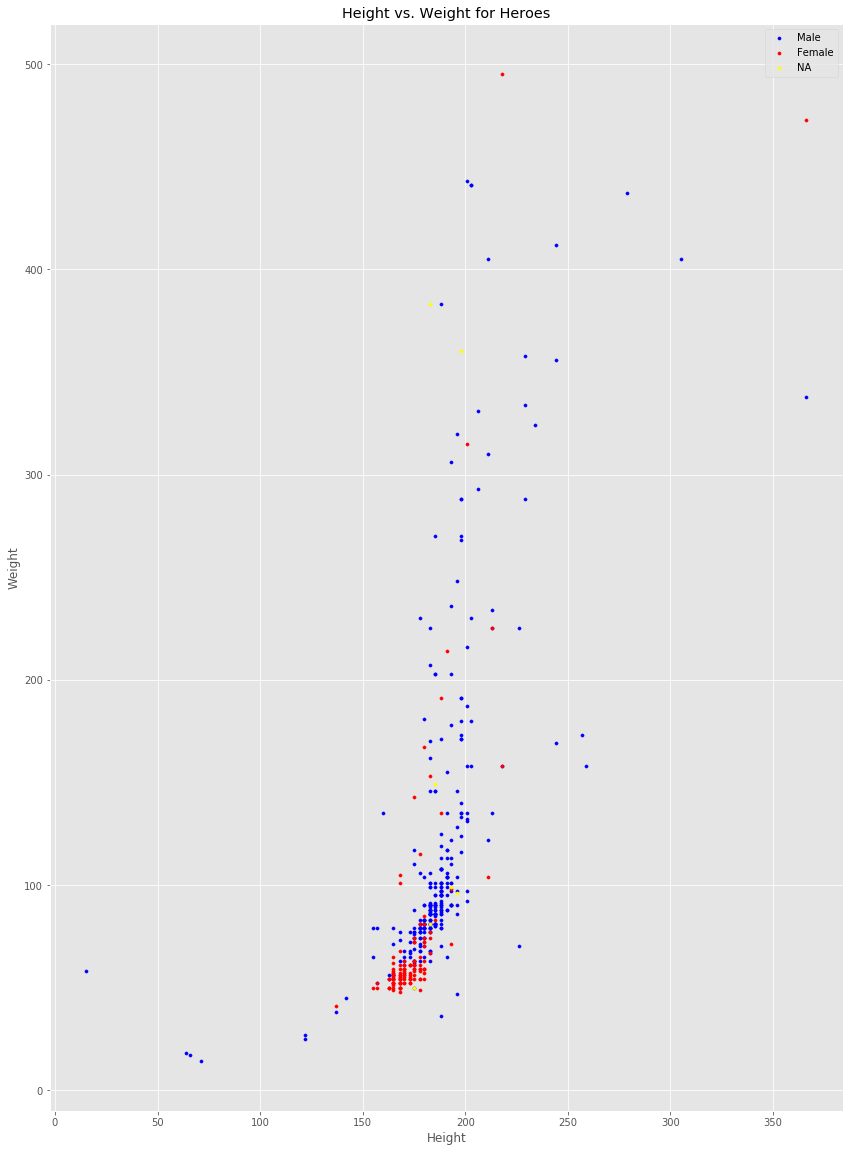

In [16]:
plt.style.use('ggplot')

no_outliers = merged.loc[(merged['Height'] < 600) & (merged['Weight'] < 600)]

male_heroes = no_outliers[no_outliers['Gender']=='Male']
female_heroes = no_outliers[no_outliers['Gender']=='Female']
na_heroes = no_outliers[no_outliers['Gender']=='NA']

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(male_heroes['Height'], male_heroes['Weight'], c='blue', label='Male', s=10)
ax.scatter(female_heroes['Height'], female_heroes['Weight'], c='red', label='Female', s=10)                                           
ax.scatter(na_heroes['Height'], na_heroes['Weight'], c='yellow', label='NA', s=10)
                                                
ax.set_title('Height vs. Weight for Heroes')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_aspect('equal')
ax.legend()
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [17]:
male_heroes_df = heroes_df[heroes_df['Gender']=='Male']
female_heroes_df = heroes_df[heroes_df['Gender']=='Female']

def show_distplot(df, gender, col, color):
    this_df = df[df['Gender']==gender][col].dropna(axis=0)
    plt.figure(figsize=(12,8))
    ax = sns.distplot(this_df, color=color)
    ax.axvline(this_df.mean(), color='r', linestyle='--')
    ax.axvline(this_df.median(), color='g', linestyle='-')

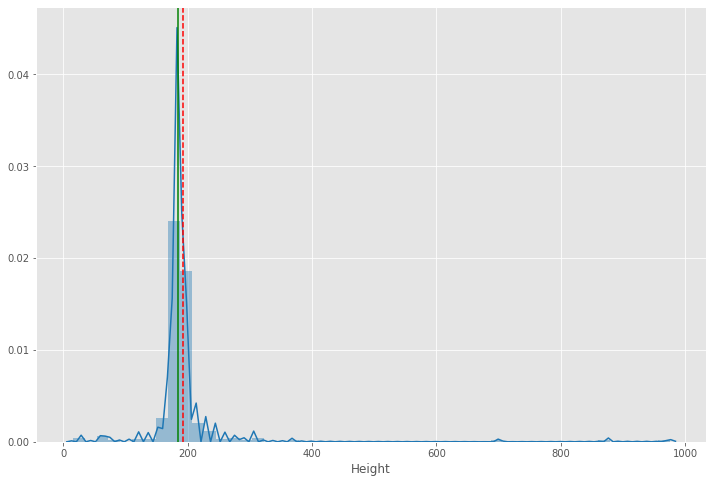

In [18]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height', 'tab:blue')

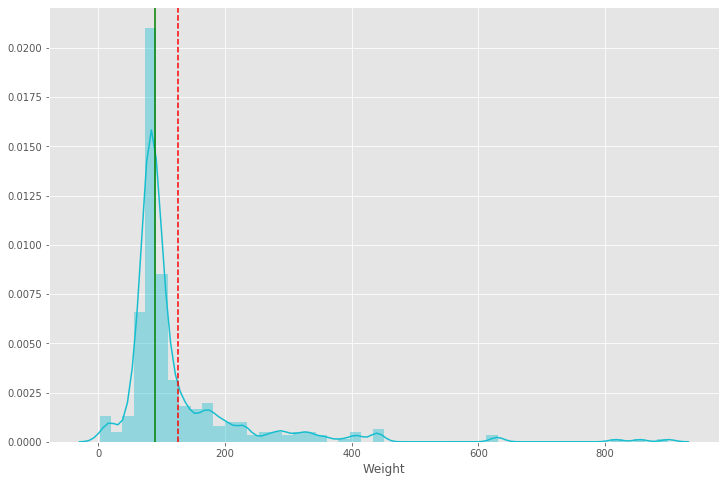

In [19]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight', 'tab:cyan')

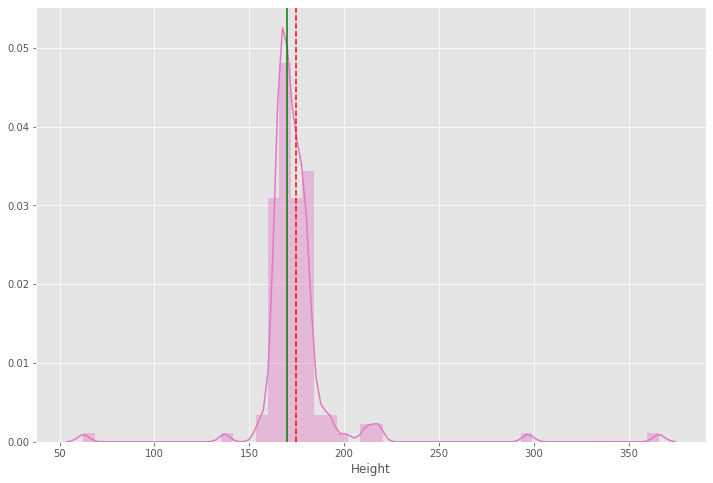

In [20]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height', 'tab:pink')

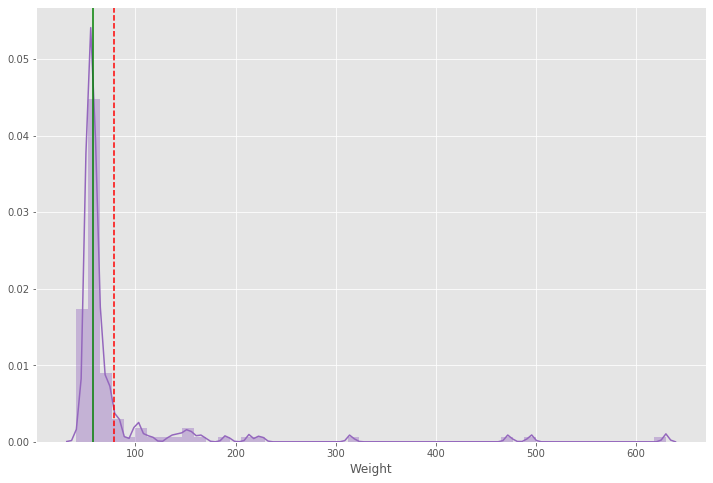

In [21]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight', 'tab:purple')

In [22]:
display('Male stats:', male_heroes_df[['Height','Weight']].describe())
display(male_heroes_df['Height'].value_counts())
display(male_heroes_df['Weight'].value_counts())

display('Female stats:', female_heroes_df[['Height','Weight']].describe())
display(female_heroes_df['Height'].value_counts())
display(female_heroes_df['Weight'].value_counts())

'Male stats:'

,Height,Weight
count,358.000000,339.000000
mean,191.974860,125.572271
std,68.826912,110.821822
min,15.200000,2.000000
25%,180.000000,79.000000
50%,185.000000,90.000000
75%,193.000000,122.000000
max,975.000000,900.000000


183.0    53
188.0    48
185.0    33
178.0    26
180.0    24
191.0    19
193.0    17
175.0    17
198.0    17
201.0    10
196.0    10
170.0     7
213.0     6
165.0     5
203.0     5
168.0     5
173.0     5
211.0     4
244.0     4
229.0     3
226.0     3
157.0     3
279.0     2
305.0     2
122.0     2
155.0     2
30.5      2
206.0     2
163.0     2
876.0     1
61.0      1
287.0     1
259.0     1
267.0     1
257.0     1
304.8     1
701.0     1
66.0      1
137.0     1
160.0     1
218.0     1
142.0     1
366.0     1
64.0      1
234.0     1
71.0      1
79.0      1
15.2      1
975.0     1
Name: Height, dtype: int64

79.0     23
90.0     19
81.0     19
86.0     15
101.0    11
         ..
140.0     1
128.0     1
338.0     1
248.0     1
306.0     1
Name: Weight, Length: 114, dtype: int64

'Female stats:'

,Height,Weight
count,144.000000,142.000000
mean,174.684028,78.838028
std,23.697817,76.975877
min,62.500000,41.000000
25%,168.000000,54.000000
50%,170.000000,58.000000
75%,178.000000,65.000000
max,366.000000,630.000000


168.0    24
165.0    21
170.0    18
175.0    15
180.0    14
173.0    12
178.0    12
163.0     6
183.0     4
218.0     2
193.0     2
188.0     2
157.0     2
366.0     1
211.0     1
62.5      1
213.0     1
185.0     1
297.0     1
201.0     1
191.0     1
137.0     1
155.0     1
Name: Height, dtype: int64

54.0     20
52.0     14
59.0     13
61.0     11
50.0     10
56.0      9
57.0      7
63.0      5
55.0      5
65.0      4
58.0      4
72.0      4
74.0      3
49.0      2
81.0      2
104.0     1
67.0      1
68.0      1
495.0     1
77.0      1
135.0     1
98.0      1
167.0     1
51.0      1
630.0     1
473.0     1
41.0      1
214.0     1
105.0     1
158.0     1
143.0     1
149.0     1
62.0      1
71.0      1
191.0     1
153.0     1
315.0     1
70.0      1
83.0      1
101.0     1
85.0      1
48.0      1
225.0     1
115.0     1
Name: Weight, dtype: int64

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

- All of the distributions - male/female height/weight - are clustered in a ~50 unit span.
    - Overall shapes (male and female):
        - Height: Strong central tendency, with very few outliers
        - Weight: Strong central tendency, but with a trailing right-skew (more high outliers than low)
- All of the means are higher than their respective medians, because there are very large (>500 units) outliers
- The female stats are smaller than the respective male stats:
    - Female mean/median heights are slightly smaller, weight significantly so
    - Std_dev of heights/weights are lower for females
    - Mode height/weight for F/M are: 183/79 vs 168/54

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

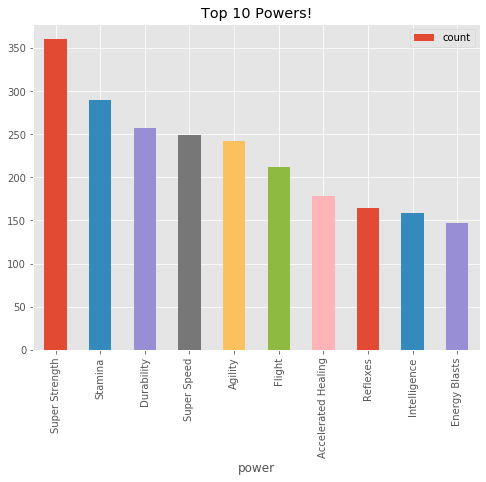

In [23]:
all_powers = powers_df.columns[1:]

def top_5(df, title):
    powers = {'power':[], 'count':[]}
    for power in all_powers:
        powers['power'].append(power)
        powers['count'].append(df[power].sum())
    power_counts = pd.DataFrame(data=powers)
    power_counts.sort_values(by='count', ascending=False, inplace=True)
    power_counts[:10].plot(x='power', y='count', kind='bar', title=title, \
                             figsize=(8,6), color=['C'+str(x) for x in range(7)])
top_5(powers_df, "Top 10 Powers!")

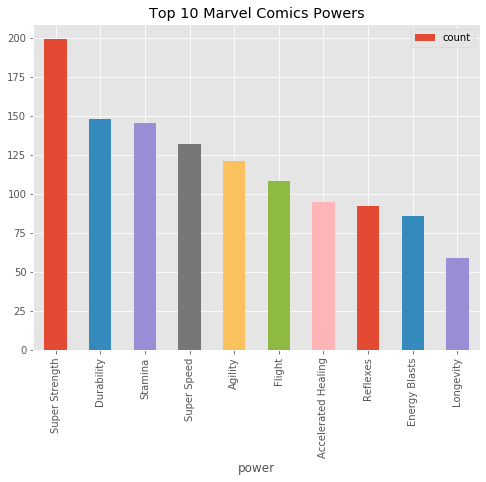

In [24]:
top_5(merged[merged['Publisher']=='Marvel Comics'], 'Top 10 Marvel Comics Powers')

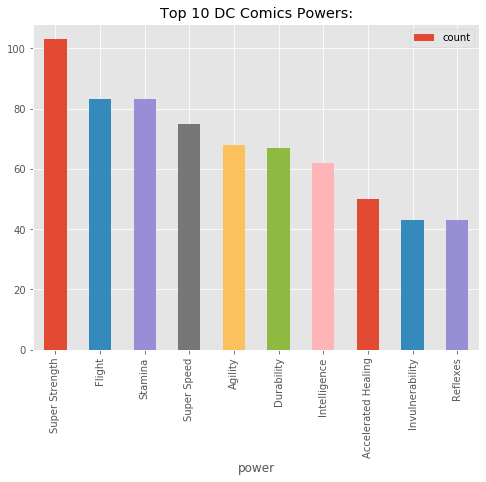

In [25]:
top_5(merged[merged['Publisher']=='DC Comics'], 'Top 10 DC Comics Powers:')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
_______________________________
## !!!
I found that looking at the top 10 gave a little more depth here:

Of the top 5 overall, Super Strength, Stamina, Super Speed, and Agility are all present in Marvel and DC's top 5's, and in that order.

However, Durability and Flight are the two that seem to be in different proportions in Marvel vs DC. Flight is #2 in DC, but #6 in Marvel; and Durability is #2 in Marvel, but #6 in DC!

Outside of those top 6, only Reflexes and Accelerated Healing are shared between Marvel and DC. In addition, Intelligence (DC) and Energy Blasts (Marvel) are the only ones exclusive to a publisher's top 10, that are also in the overall top 10.

Overall, the very top powers are basically similar, but with a few notable differences.
## !!!

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
- I'll explore these 4 areas:
    - Which heroes have the most powers? What is the distribution of numbers of powers?
    - Do heroes with Super Strength tend to have higher heights and/or weights?
    - What are the most likely pairings of powers? And does gender affect this?
    - Finally, do height and/or weight correlate with number of powers?
---


In [26]:
# Which heroes have the most powers?
merged = pd.merge(heroes_df2, powers_df, how='inner', on='name') # Resetting 'merged' df
print(len(merged.columns[10:]))
col_list = merged.columns[10:]
merged['num_powers'] = merged[col_list].sum(axis=1)

167


In [27]:
merged[['name','num_powers']].sort_values(by='num_powers', ascending=False)[:20]

,name,num_powers
543,Spectre,49
17,Amazo,44
356,Living Tribunal,35
378,Martian Manhunter,35
372,Man of Miracles,34
133,Captain Marvel,33
576,T-X,33
573,T-1000,32
235,Galactus,32
404,Mister Mxyzptlk,31


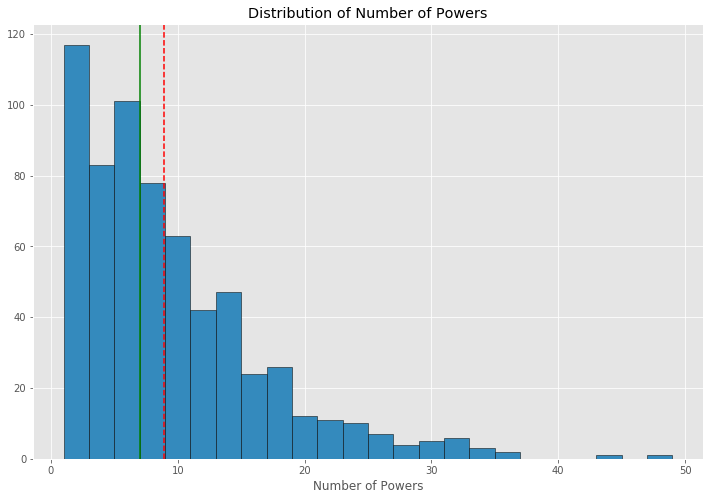

In [28]:
this_df = merged['num_powers']

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(this_df, edgecolor='black', color=['C1'], bins='auto')
ax.set_xlabel('Number of Powers')
ax.set_title('Distribution of Number of Powers')
ax.axvline(this_df.mean(), color='r', linestyle='--')
ax.axvline(this_df.median(), color='g', linestyle='-')
None

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88db04080>],
      dtype=object)

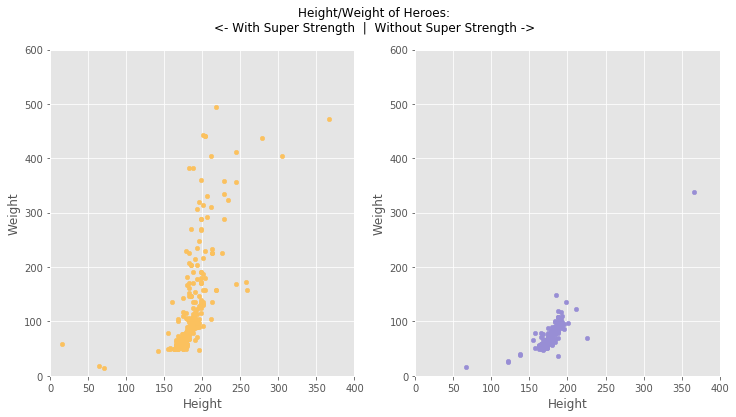

In [29]:
# Do heroes with Super Strength tend to have higher heights and/or weights?
strongs = merged[merged['Super Strength']==True]
weaks = merged[merged['Super Strength']==False]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.suptitle('Height/Weight of Heroes:\n<- With Super Strength  |  Without Super Strength ->')
strongs.plot(ax = axes[0],subplots=True,
            kind='scatter',
            x='Height',
            y='Weight',
            figsize=(8,6),
            xlim=(0,400),
            ylim=(0,600),
            color='C4')

weaks.plot(ax = axes[1],subplots=True,
           kind='scatter',
           x='Height',
           y='Weight',
           figsize=(8,6),
           xlim=(0,400),
           ylim=(0,600),
           color='C2')

Here we see that there is a central cluster common to both plots, but a large 'spray' of heroes in the Super Strong plot (left) that have much higher weights, and somewhat higher heights.

In [30]:
# What are the most likely pairings of powers?
# Ex: Super Strengh + Agility? Intelligence + Flight?
import itertools
all_pairs = list(itertools.combinations(all_powers, 2))
pair_cts = {}
for pair in all_pairs:
    pair_cts[pair] = 0

In [31]:
def test_hero(hero, df):
    this_powers = []
    for power in all_powers:
        if df[df['name']==hero][power].all():
            this_powers.append(power)
    this_pairs = list(itertools.combinations(this_powers, 2))
    for pair in this_pairs:
        if pair in all_pairs:
            pair_cts[pair] += 1
for hero in merged['name']:
    test_hero(hero, merged)
    
pair_cts

{('Agility', 'Accelerated Healing'): 99,
 ('Agility', 'Lantern Power Ring'): 5,
 ('Agility', 'Dimensional Awareness'): 11,
 ('Agility', 'Cold Resistance'): 25,
 ('Agility', 'Durability'): 111,
 ('Agility', 'Stealth'): 93,
 ('Agility', 'Energy Absorption'): 31,
 ('Agility', 'Flight'): 72,
 ('Agility', 'Danger Sense'): 26,
 ('Agility', 'Underwater breathing'): 8,
 ('Agility', 'Marksmanship'): 83,
 ('Agility', 'Weapons Master'): 69,
 ('Agility', 'Power Augmentation'): 2,
 ('Agility', 'Animal Attributes'): 15,
 ('Agility', 'Longevity'): 58,
 ('Agility', 'Intelligence'): 71,
 ('Agility', 'Super Strength'): 162,
 ('Agility', 'Cryokinesis'): 6,
 ('Agility', 'Telepathy'): 35,
 ('Agility', 'Energy Armor'): 4,
 ('Agility', 'Energy Blasts'): 60,
 ('Agility', 'Duplication'): 8,
 ('Agility', 'Size Changing'): 18,
 ('Agility', 'Density Control'): 6,
 ('Agility', 'Stamina'): 172,
 ('Agility', 'Astral Travel'): 0,
 ('Agility', 'Audio Control'): 4,
 ('Agility', 'Dexterity'): 4,
 ('Agility', 'Omnitrix')

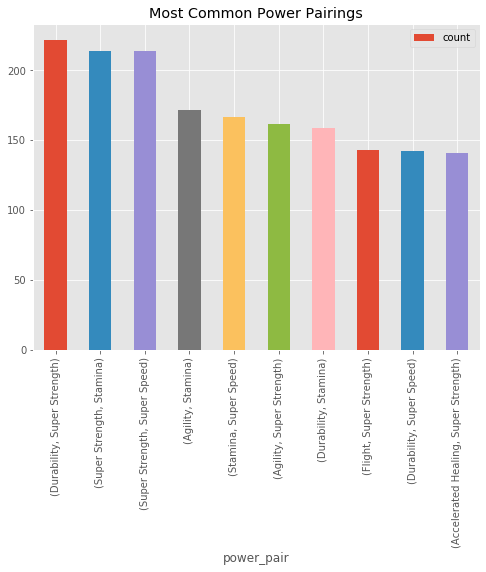

In [32]:
sorted_pairs = sorted(pair_cts.items(), key=lambda x: x[1], reverse=True)
pair_cts_df = pd.DataFrame(sorted_pairs, columns=['power_pair','count'])
pair_cts_df[:10].plot(x='power_pair', y='count', kind='bar',
                     title='Most Common Power Pairings',
                     figsize=(8,6), color=['C'+str(x) for x in range(7)])

In [33]:
def plot_pairs(df, gender, how_many):
    all_pairs = list(itertools.combinations(all_powers, 2))
    counts = {}
    for pair in all_pairs:
        counts[pair] = 0
    this_df = df[df['Gender']==gender]
    for hero in this_df['name']:
        this_powers = []
        for power in all_powers:
            if this_df[this_df['name']==hero][power].all():
                this_powers.append(power)
        this_pairs = list(itertools.combinations(this_powers, 2))
        for pair in this_pairs:
            if pair in all_pairs:
                counts[pair] += 1
    sorted_pairs = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    pair_cts_df = pd.DataFrame(sorted_pairs, columns=['power_pair','count'])
    pair_cts_df[:how_many].plot(x='power_pair', y='count', kind='bar',
                         title=f'Most Common {gender} Power Pairings',
                         figsize=(8,6), color=['C'+str(x) for x in range(7)])

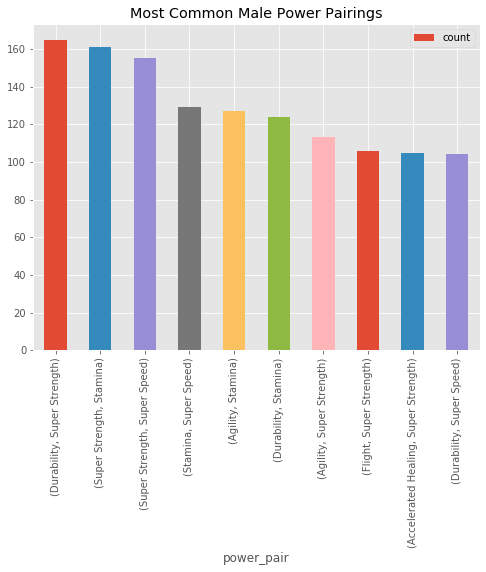

In [34]:
plot_pairs(merged, 'Male', 10)

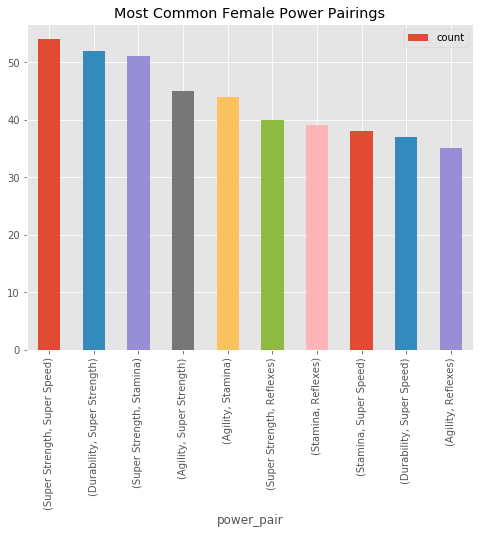

In [35]:
plot_pairs(merged, 'Female', 10)

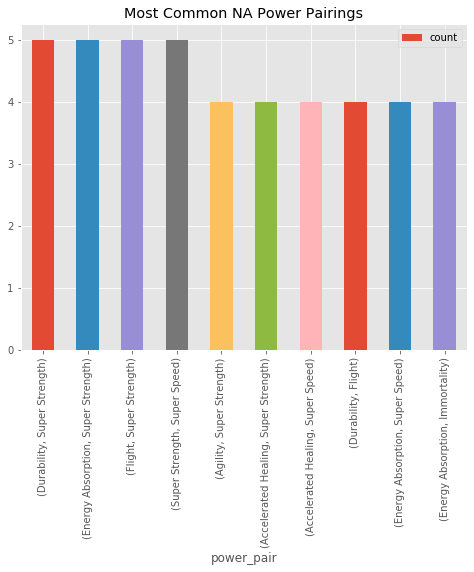

In [36]:
plot_pairs(merged, 'NA', 10)

So above, we can see the power pairings that are most common for: all heroes, males, females, and 'NA' (a small subset).

The top three for the three main categories (not counting 'NA') are all the same, though in slightly different orders: Durability/Super Strength, Super Strength/Stamina, and Super Strength/Super Speed. So obviously Super Strength is the most common power, and it's largely a matter of which power is likely to be paired with it.

In addition, we see a bit more tendency for males to have things like Flight and Accelerated Healing, while females are a bit more likely to have Reflexes and Agility.

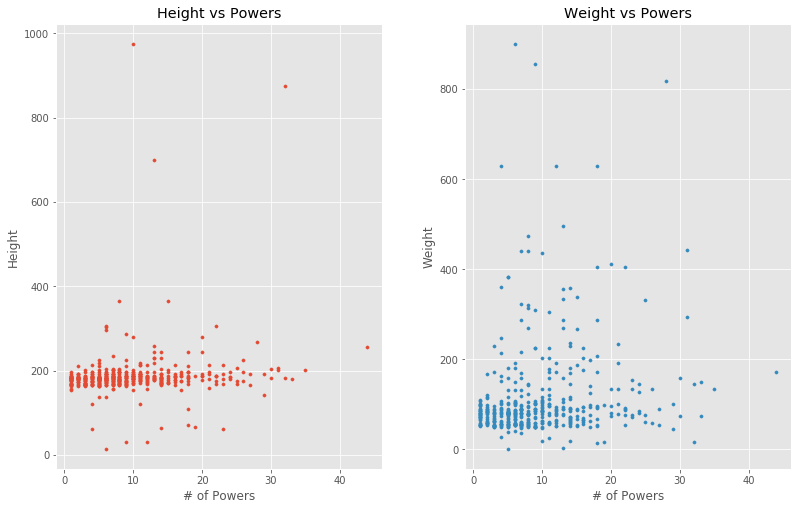

In [37]:
# Finally, do height and/or weight correlate with number of powers?
plt.subplots(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.scatter(merged['num_powers'], merged['Height'], color='C0', s=10) 
plt.title('Height vs Powers') 
plt.xlabel('# of Powers') 
plt.ylabel('Height') 

plt.subplot(1, 2, 2) 
  
plt.scatter(merged['num_powers'], merged['Weight'], color='C1', s=10) 
plt.title('Weight vs Powers') 
plt.xlabel('# of Powers') 
plt.ylabel('Weight') 

plt.tight_layout(4) 

plt.show()

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data